# 作业说明

请填写代码以完成作业，并将整个包以 zip 文件的形式提交到网络学堂

# 第一步

运行以下代码以导入你需要的模块，如需要你也可以修改此代码（例如，导入更多模块）

In [1]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, urllib, os
import scipy.ndimage # For image filtering
import imageio # For loading images
import numpy as np
from numpy import array, zeros, arange, exp, random, ones_like, zeros_like,ones
from scipy.fftpack import dct
from scipy.fftpack import idct
from scipy.signal import convolve,convolve2d,correlate2d,correlate
from imageio import imread
import itertools,math
import matplotlib.pyplot as plt
import unittest
from PIL import  Image

# 问题1：滤波器

滤波器是一种从信号中去除一些不需要的成分或特征的设备或过程

了解滤波的生成与应用可以帮助我们解决很多实际问题，例如图像去噪

## 1.1 均值滤波器

均值滤波器用局部平均代替像素，具有平滑（模糊）的效果

在这个问题中，我们将实现一个简单的均值滤波器

你可以参考下图来回忆计算过程

<img src="box_filter.png" align='middle' width="50%"> 

In [3]:
def box_kernel(size):
    # K = np.zeros((size, size))
    ####################
    # your code
    K = np.ones(size) / (size ** 2)
    ####################  
    return K


## 1.2 高斯滤波器

高斯滤波器的核值是从二维高斯函数中采样的。 权重随着与中心像素的距离而下降
  
(a) 请完成函数 gaussian_kernel() 生成内核
  
(b) 请完成函数 gaussian_filter() 得到高斯模糊图像

你可以参考下图来回忆计算过程

<img src="gaussian_filter.png" align='middle'>

In [4]:
def gaussian_kernel(size, sigma):
    K = np.zeros((size, size))
    pad = size//2
    
    for x in range(-pad, -pad+size):
        for y in range(-pad, -pad+size):
            ####################
            # your code
            K[x, y] = 1 / (2 * np.pi * sigma**2) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
            continue
            ####################
            
    return K

# TODO def gaussian_filter(image, kernel):
    


# 问题2：图像去噪

生成完滤波器，我们希望使用其解决图像去噪的问题

在这个问题中，我们将不同滤波器作用于不同的噪声图像上，观察处理的结果

提示：为了进行卷积，我们经常使用零填充，即在原始图像周围添加零。 以 [L,W,C] 图像为例。 如果内核大小为 3，我们将在图像周围添加一列和一行零，因此填充后的图像大小为 [L+2, W+2, C]

# 2.1 图像1

(256, 256)


(-0.5, 255.5, 255.5, -0.5)

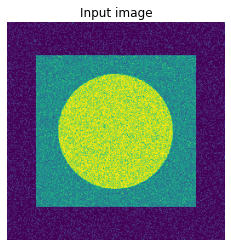

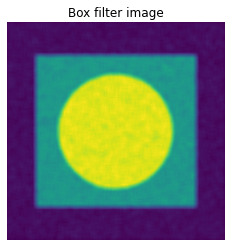

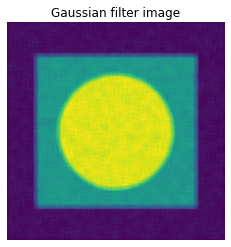

In [5]:
im = imageio.imread('noise_img1.png')
print(im.shape)

def img_filter(image, r, K):
    L, W = image.shape # L: length; W: width; C: channel
    
    #im_pad: generated for zero-padding
    im_pad = np.zeros((L+r-1, W+r-1))
    im_pad[r//2:L+r//2, r//2:W+r//2] = image
    im_output = np.zeros((L, W))
    
    for i in range(r//2,L+r//2): # length position
        for j in range(r//2,W+r//2): # width position
            ####################
            # your code
            im_output[i - r//2, j - r//2] = np.sum(np.multiply(im_pad[i - r//2 : i - r//2 + r, j - r//2 : j - r//2 + r], K))
            continue
            ####################

    return im_output

plt.figure()
plt.imshow(im)
plt.title('Input image')
plt.axis('off')

kernel_size = 7
K_box = box_kernel(size=kernel_size)
K_guassian = gaussian_kernel(size=kernel_size, sigma=2)

im_box = img_filter(im, r=kernel_size, K=K_box)
im_gaussian = img_filter(im, r=kernel_size, K=K_guassian)

plt.figure()
plt.imshow(im_box/255)
plt.title('Box filter image')
plt.axis('off')

plt.figure()
plt.imshow(im_gaussian/255)
plt.title('Gaussian filter image')
plt.axis('off')


# 2.2 图像2

(256, 256)


(-0.5, 255.5, 255.5, -0.5)

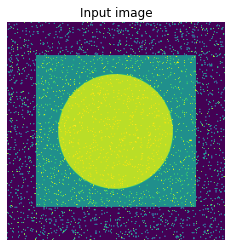

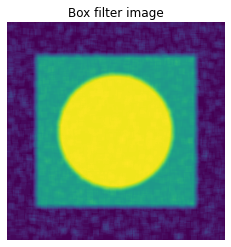

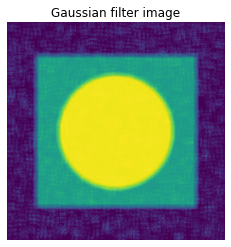

In [6]:
im = imageio.imread('noise_img2.png')
print(im.shape)

def img_filter(image, r, K):
    L, W = image.shape # L: length; W: width; C: channel
    
    #im_pad: generated for zero-padding
    im_pad = np.zeros((L+r-1, W+r-1))
    im_pad[r//2:L+r//2, r//2:W+r//2] = image
    im_output = np.zeros((L, W))
    
    for i in range(r//2,L+r//2): # length position
        for j in range(r//2,W+r//2): # width position
            ####################
            # your code
            im_output[i - r//2, j - r//2] = np.sum(np.multiply(im_pad[i - r//2 : i - r//2 + r, j - r//2 : j - r//2 + r], K))
            continue
            ####################

    return im_output

plt.figure()
plt.imshow(im)
plt.title('Input image')
plt.axis('off')

kernel_size = 7
K_box = box_kernel(size=kernel_size)
K_guassian = gaussian_kernel(size=kernel_size, sigma=2)

im_box = img_filter(im, r=kernel_size, K=K_box)
im_gaussian = img_filter(im, r=kernel_size, K=K_guassian)

plt.figure()
plt.imshow(im_box/255)
plt.title('Box filter image')
plt.axis('off')

plt.figure()
plt.imshow(im_gaussian/255)
plt.title('Gaussian filter image')
plt.axis('off')


# 2.3 问题思考

比较两张图片的去噪结果

试分析造成两张图片去噪效果不同的原因

## 2.3.1 比较
### 2.3.1.1 按照滤波器不同比较
有两种方法得到的两种滤波结果可以看到，均值滤波器和高斯滤波器结果相近
### 2.3.1.2 按照图片不同比较
将图中从外向内三个区域编号为1、2、3
则图一中区域1去噪效果较好，区域2一般，区域3较差；
图二中区域1去燥效果较差，区域2一般，区域3较好
## 2.3.2 分析
### 2.3.2.1 图片1
图一噪声幅度较小，区域颜色与噪声颜色相近程度为区域1 > 区域2 > 区域3，所以在区域1滤波效果较好，区域3滤波效果较差。
### 2.3.2.2 图片2
图而噪声幅度较大，区域颜色与噪声颜色相近程度为区域3 > 区域2 > 区域1，所以在区域3滤波效果较好，区域1滤波效果较差。

# 2.4 问题解决——中值滤波

中值滤波可以有效解决上述问题

现在请实现图像的中值滤波并比较与2.2中结果的区别

(256, 256)


(-0.5, 255.5, 255.5, -0.5)

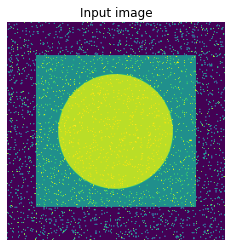

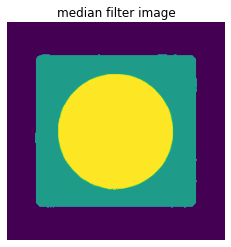

In [4]:
im = imageio.imread('noise_img2.png')
print(im.shape)

def img_median_filter(image, r):
    L, W = image.shape # L: length; W: width; C: channel
    
    #im_pad: generated for zero-padding
    im_pad = np.zeros((L+r-1, W+r-1))
    im_pad[r//2:L+r//2, r//2:W+r//2] = image
    im_output = np.zeros((L, W))
    
    for i in range(r//2,L+r//2): # length position
        for j in range(r//2,W+r//2): # width position
            ####################
            # your code
            temp_img = im_pad[i - r//2 : i - r//2 + r, j - r//2 : j - r//2 + r]
            new_temp = np.sort(np.reshape(temp_img, (-1, 1)), axis=0)
            im_output[i - r//2, j - r//2] = new_temp[r**2 // 2]
            continue
            ####################
                
    return im_output

plt.figure()
plt.imshow(im)
plt.title('Input image')
plt.axis('off')

im_meidan = img_median_filter(im, r=11)

plt.figure()
plt.imshow(im_meidan/255)
plt.title('median filter image')
plt.axis('off')